In [1]:
!pip install openpyxl

## Importing Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
X=online_retail.data.original
  
# metadata 
print(online_retail.metadata) 
  
# variable information 
print(online_retail.variables) 

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

## Data Cleaning

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
X.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
X[X.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [8]:
X[X.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


- The approach to remove the null values from the description is getting the most frequently occuring description and joining the most_freq table with the original data and masking(replace) the null values with matched_description of the most_freq table
- Leaving the empty values for customer_id as Assumed that it is not required in our analysis 

In [9]:
most_freq=X[['Description','StockCode']].value_counts().reset_index()

In [10]:
most_freq=most_freq.groupby(by='StockCode').head(1)
most_freq.head(5)

,Description,StockCode,count
0,WHITE HANGING HEART T-LIGHT HOLDER,85123A,2302
1,REGENCY CAKESTAND 3 TIER,22423,2200
2,JUMBO BAG RED RETROSPOT,85099B,2159
3,PARTY BUNTING,47566,1727
4,LUNCH BAG RED RETROSPOT,20725,1638


In [11]:
most_freq[most_freq.StockCode=="85123A"]

,Description,StockCode,count
0,WHITE HANGING HEART T-LIGHT HOLDER,85123A,2302


In [12]:
most_freq.columns = ["Description", "StockCode", "count"]
most_freq.head(3)

,Description,StockCode,count
0,WHITE HANGING HEART T-LIGHT HOLDER,85123A,2302
1,REGENCY CAKESTAND 3 TIER,22423,2200
2,JUMBO BAG RED RETROSPOT,85099B,2159


In [13]:
df=X.merge(most_freq,on='StockCode',how='left')

In [14]:
df

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_y,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,148.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,320.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,307.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,162.0


In [15]:
df[df['Description_x'].isnull()]

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_y,count
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC,988.0
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom,NaN,NaN
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,CHRISTMAS CRAFT HEART STOCKING,1.0
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,NEW ENGLAND MUG W GIFT BOX,2.0
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT,91.0
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom,HOME SWEET HOME KEY HOLDER,114.0
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom,SET OF 4 ROSE BOTANICAL CANDLES,172.0
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,164.0


In [16]:
df['Description_x']=df['Description_x'].mask(df['Description_x'].isnull(),df['Description_y'])
df.isnull().sum()

InvoiceNo             0
StockCode             0
Description_x       112
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       135080
Country               0
Description_y       112
count               112
dtype: int64

In [17]:
df.dropna(subset=['Description_x'], inplace=True)
df.isnull().sum()

InvoiceNo             0
StockCode             0
Description_x         0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       134968
Country               0
Description_y         0
count                 0
dtype: int64

In [18]:
df.drop(columns = ["Description_y", "count"], inplace=True)

In [19]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541797.000000,541797.000000,406829.000000
mean,9.555919,4.612067,15287.690570
std,218.103428,96.769831,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [20]:
df3=df[(df.UnitPrice>0) & (df.Quantity>0)]

In [21]:
df3.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


- We have not removed the outlier as this customer might be important for Our client

<Axes: >

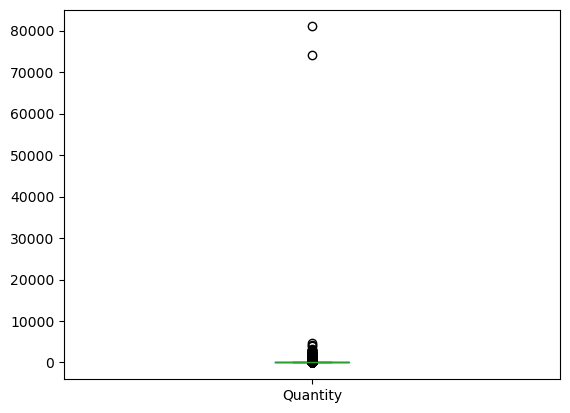

In [22]:
df3['Quantity'].plot(kind='box')

## Feature Engineering

- The Approach is to make an TotalPrice columns by Multiplying Quantity and UnitPrice for detailed Revenue Analysis

In [23]:
df3.loc[:,'TotalPrice']=df3['Quantity']*df3['UnitPrice']

C:\Users\swaya\AppData\Local\Temp\ipykernel_17808\261056646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,'TotalPrice']=df3['Quantity']*df3['UnitPrice']


In [24]:
## Converting Invoice column into Datetime type and Creating Month columns for monthly analysis
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])
df3.loc[:,'Month']=df3['InvoiceDate'].dt.month

C:\Users\swaya\AppData\Local\Temp\ipykernel_17808\2522339161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])
C:\Users\swaya\AppData\Local\Temp\ipykernel_17808\2522339161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,'Month']=df3['InvoiceDate'].dt.month


In [25]:
#extracting year
df3.loc[:,'Year']=df3['InvoiceDate'].dt.year

C:\Users\swaya\AppData\Local\Temp\ipykernel_17808\63804717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,'Year']=df3['InvoiceDate'].dt.year


In [26]:
#Combining to make YearMonth column
df3['YearMonth'] = pd.to_datetime(df3['Year'].astype(str) + '-' + df3['Month'].astype(str), format='%Y-%m')

C:\Users\swaya\AppData\Local\Temp\ipykernel_17808\2789421860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['YearMonth'] = pd.to_datetime(df3['Year'].astype(str) + '-' + df3['Month'].astype(str), format='%Y-%m')


In [27]:
df3.drop(columns=['Year','Month'],inplace=True)

C:\Users\swaya\AppData\Local\Temp\ipykernel_17808\743366559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns=['Year','Month'],inplace=True)


In [28]:
### This is our Final Data preprocessed for Analysis
df3

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01


## Insights and Visualization

#### Monthly Sales Trend

In [29]:
monthly_sales=df3.groupby('YearMonth')['TotalPrice'].sum().reset_index()

In [30]:
monthly_sales

,YearMonth,TotalPrice
0,2010-12-01,823746.140
1,2011-01-01,691364.560
2,2011-02-01,523631.890
3,2011-03-01,717639.360
4,2011-04-01,537808.621
5,2011-05-01,770536.020
6,2011-06-01,761739.900
7,2011-07-01,719221.191
8,2011-08-01,759138.380
9,2011-09-01,1058590.172


In [31]:
monthly_sales.set_index(keys='YearMonth',inplace=True)

In [32]:
import seaborn as sns

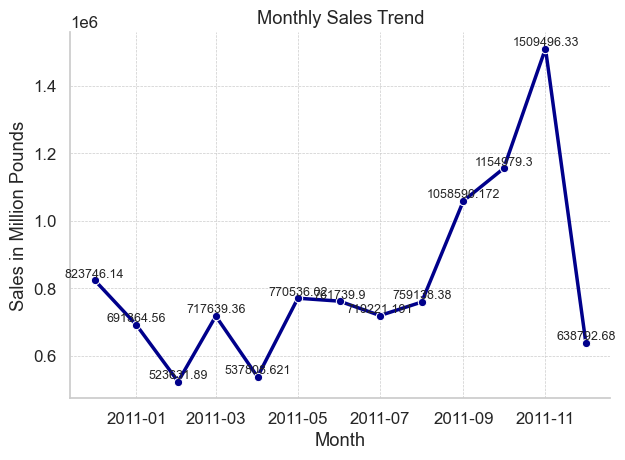

In [36]:
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
sns.lineplot(data=monthly_sales,x='YearMonth',y='TotalPrice',color='darkblue',linewidth=2.5,marker='o')
plt.xlabel('Month')
plt.ylabel('Sales in Million Pounds')
plt.title('Monthly Sales Trend')
plt.tight_layout()
for x, y in zip(monthly_sales.index, monthly_sales['TotalPrice']):
    plt.text(x, y + 3, f'{y}', ha='center', va='bottom', fontsize=9)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()  # remove top and right borders
plt.show()

## Top5 countries by Sales

In [37]:
country_sales=df3.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)

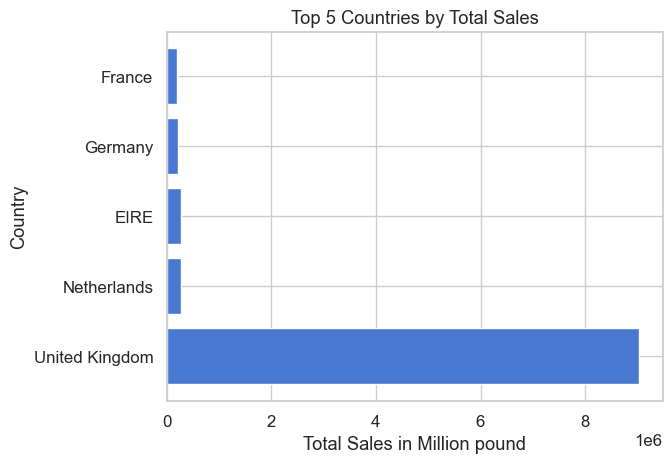

In [39]:
plt.barh(country_sales.index,country_sales.values)
plt.xlabel('Total Sales in Million pound')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.show()

UK has the highest sales (around 9 million)
Netherlands, EIRE, Germany and France are the next 4 countries each having a sales of more than 2 million
Since these countries cover the major sales revenues, we need to pay special attention to customers in these countries and make sure our product quality and service are the best. Also to break dependancy of sales from a single country we can focus on expanding sales in other countries as well

In [40]:
country_wise=df3.groupby('Country')['TotalPrice'].sum()

In [41]:
total_sales=country_wise.sum()

In [42]:
top5_countries=country_wise.sort_values(ascending=False).head(5)

In [43]:
perc=(top5_countries/total_sales)*100

In [44]:
perc.reset_index()

,Country,TotalPrice
0,United Kingdom,84.611315
1,Netherlands,2.676055
2,EIRE,2.657376
3,Germany,2.145626
4,France,1.966076


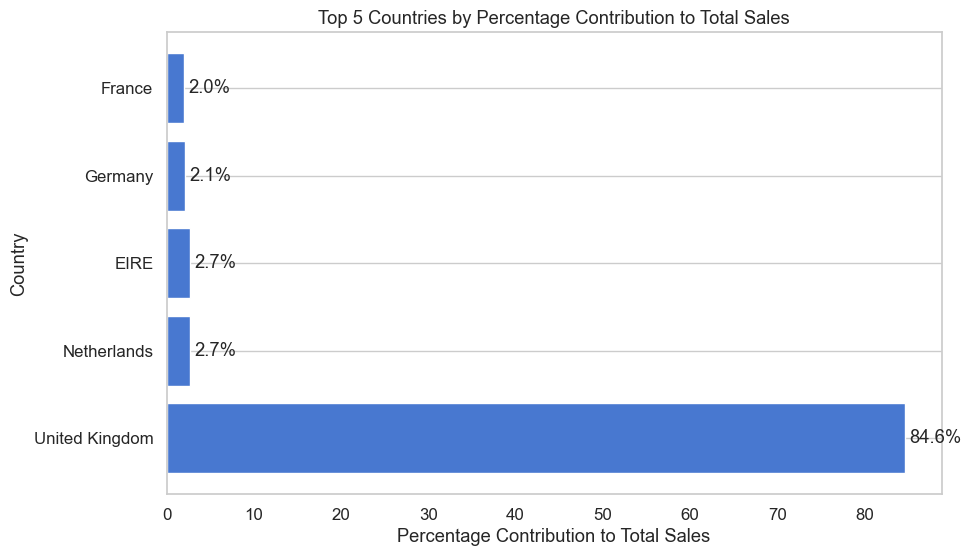

In [45]:
plt.figure(figsize=(10, 6))
bars = plt.barh(top5_countries.index, perc)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')
# Add percentage labels to the bars
for bar, percentage in zip(bars, perc):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()

In [46]:
## Top 5 sold Products
product_wise=df3.groupby('StockCode')['TotalPrice'].sum()

In [47]:
top5_products=product_wise.sort_values(ascending=False).head(5)

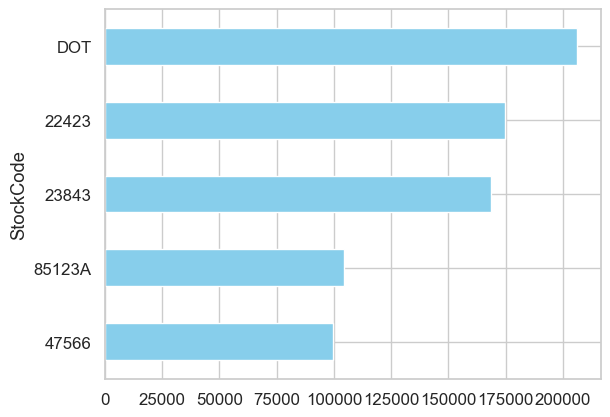

In [48]:
top5_products.plot(kind='barh',color='skyblue')
plt.gca().invert_yaxis()
plt.show()

In [49]:
product_wise.sum()

10666684.544

In [50]:
for stock_code in top5_products.index:
    description=df3[df3.StockCode==stock_code].Description_x.iloc[0]
    print(f'{stock_code}==>{description}')

DOT==>DOTCOM POSTAGE
22423==>REGENCY CAKESTAND 3 TIER
23843==>PAPER CRAFT , LITTLE BIRDIE
85123A==>WHITE HANGING HEART T-LIGHT HOLDER
47566==>PARTY BUNTING


## Recency,Frequency,Monetary Analysis

In [51]:
current_date=df3['InvoiceDate'].max()+pd.Timedelta(days=1)

In [63]:
rfm_df=df3.groupby('CustomerID').agg(
    {
        'InvoiceDate':lambda x :(current_date-x.max()).days,#No of Days earlier purchased
        'InvoiceNo':'count',#Frequency of Purchase
        'TotalPrice':'sum'#Total Sales by Customer
    }
    )

In [64]:
rfm_df.columns=['Recency','Frequency','Monetary']

In [65]:
##rank customers based on Recency, Frequency and Monetary. Lower recency is better while higher frequency and monetary values are better.
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

In [67]:
## normalize the ranks to a scale of 0-100 to make them easier to compare. 
## makes the ranks more consistent across different customers and helps in calculating the final RFM score.
rfm_df['R_rank_norm'] = (rfm_df['R_rank'] / rfm_df['R_rank'].max()) * 100
rfm_df['F_rank_norm'] = (rfm_df['F_rank'] / rfm_df['F_rank'].max()) * 100
rfm_df['M_rank_norm'] = (rfm_df['M_rank'] / rfm_df['M_rank'].max()) * 100

In [68]:
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
CustomerID,,,,,,
12346.0,326,1,77183.60,3.751165,0.829876,99.792531
12347.0,2,182,4310.00,97.914725,88.105118,92.277547
12348.0,75,31,1797.24,38.513514,42.104657,76.832642
12349.0,19,73,1757.55,74.137931,66.562932,76.187183
12350.0,310,17,334.40,5.370457,24.919318,28.331028


In [72]:
## Weightage Given to Recency 15%,Frequency 28% and Monetary Value as 57%
rfm_df['RFM_Score'] = 0.15 * rfm_df['R_rank_norm'] + 0.28 * rfm_df['F_rank_norm'] + 0.57 * rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

In [78]:
#Sorting 10 top customers by RFM Score on 5-point Scale
rfm_df.sort_values(by='RFM_Score',ascending=False).head(10)

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
CustomerID,,,,,,,
14911.0,1,5675,143825.06,100.00,99.98,99.91,5.00
15311.0,1,2379,60767.90,100.00,99.88,99.70,4.99
12748.0,1,4595,33719.73,100.00,99.93,99.38,4.98
14646.0,2,2076,280206.02,97.91,99.86,100.00,4.98
17841.0,2,7847,40991.57,97.91,100.00,99.49,4.97
17675.0,1,705,20374.28,100.00,99.15,99.05,4.96
18102.0,1,431,259657.30,100.00,97.37,99.98,4.96
13098.0,1,572,28882.44,100.00,98.64,99.29,4.96
13089.0,3,1818,58825.83,95.88,99.84,99.68,4.96


In [79]:
## Segmenting Customer on the basis of RFM_Score
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, "Top Customers",
                                       np.where(rfm_df['RFM_Score'] > 4, "High value Customer",
                                                np.where(rfm_df['RFM_Score'] > 3, "Medium Value Customer",
                                                         np.where(rfm_df['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers'))))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
## Displaying some Segments of customers
rfm_df[['RFM_Score', 'Customer_segment']].head(20)

,RFM_Score,Customer_segment
CustomerID,,
12346.0,2.88,Low Value Customers
12347.0,4.60,Top Customers
12348.0,3.07,Medium Value Customer
12349.0,3.66,Medium Value Customer
12350.0,1.20,Lost Customers
12352.0,3.82,Medium Value Customer
12353.0,0.27,Lost Customers
12354.0,2.77,Low Value Customers
12355.0,1.48,Lost Customers


In [87]:
segmentation=rfm_df['Customer_segment'].value_counts().reset_index()
segmentation

,Customer_segment,count
0,Low Value Customers,1407
1,Lost Customers,1281
2,Medium Value Customer,957
3,High value Customer,404
4,Top Customers,289


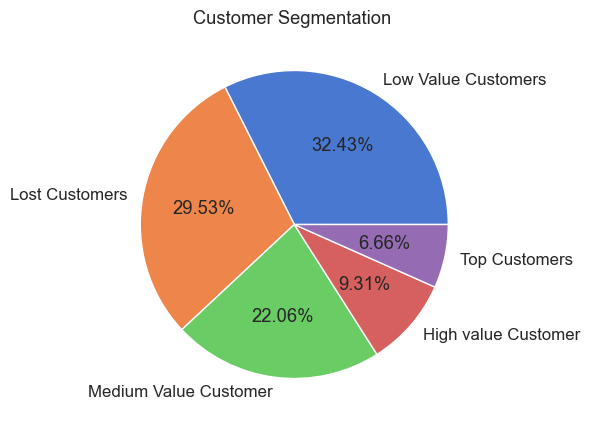

In [113]:
plt.figure(figsize=(10,5))
plt.pie(segmentation['count'],labels=segmentation['Customer_segment'],autopct='%.2f%%')
plt.title('Customer Segmentation ')
plt.show()

## Customer Churn Analysis

In [115]:
#calculating last purchase done
customer_last_purchase = df3.groupby("CustomerID")['InvoiceDate'].max()
customer_last_purchase.head(5)

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [116]:
type(customer_last_purchase)

pandas.core.series.Series

In [117]:
current_date

Timestamp('2011-12-10 12:50:00')

In [118]:
customer_last_purchase=(current_date - customer_last_purchase).dt.days

In [119]:
# Define churn threshold (e.g., 90 days without purchase)
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)


CustomerID
12346.0    326
12350.0    310
12353.0    204
12354.0    232
12355.0    214
Name: InvoiceDate, dtype: int64

Number of Churned Customers: 1449


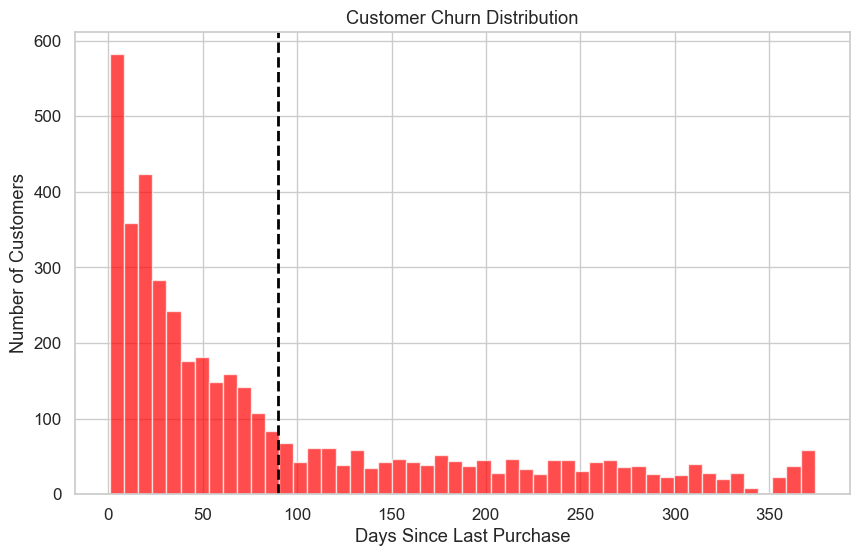

In [120]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

In [121]:
unique_customer=df3.groupby("CustomerID")['InvoiceDate'].count()

In [122]:
print("Percentage of customers churned :",round((len(churned_customers)/unique_customer.count())*100,2))

Percentage of customers churned : 33.4


In [124]:
df_monthly=df3.groupby('YearMonth')['TotalPrice'].sum().reset_index()

In [126]:
df3['YearMonth'].value_counts()

YearMonth
2011-11-01    83369
2011-10-01    59304
2011-09-01    49261
2010-12-01    41480
2011-07-01    38645
2011-05-01    36164
2011-06-01    35977
2011-03-01    35803
2011-08-01    34483
2011-01-01    34306
2011-04-01    29096
2011-02-01    27105
2011-12-01    25111
Name: count, dtype: int64